In [ ]:
!pip install pandas_profiling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pickle

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Placement_data_full_class.csv to Placement_data_full_class.csv


In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/iketutg/my_example_ds/main/data/Placement_Data_Full_Class.csv')
#Remove Serial Number
data.drop("sl_no", axis=1, inplace=True)

### Examining Dataset

In [4]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [9]:
print ("The shape of the  data is (row, column):"+ str(data.shape))
print (data.info())

The shape of the  data is (row, column):(215, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB
None


In [12]:
#report = data.profile_report(title='Campus Placement Data - Report',
                           #  progress_bar=False)
#report

# Uncomment syntax below to make new html file

# report.to_file(output_file='output.html')

## Data Cleaning / Handling missing values

In [13]:
data['salary'].fillna(value=0, inplace=True)
print('Salary column with null values:',
      data['salary'].isnull().sum(), sep = '\n')

Salary column with null values:
0


## Exploring Data by each Features

In [14]:
"""
Feature: Gender

Does gender affect placements?
"""

data.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


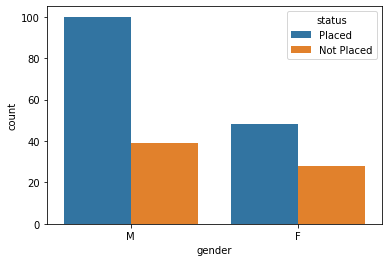

In [15]:
sns.countplot("gender", hue="status", data=data)
plt.show()

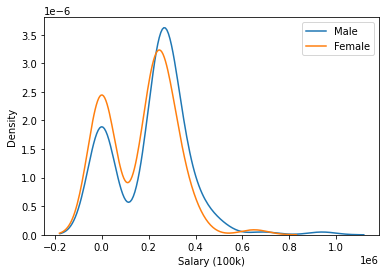

In [16]:
sns.kdeplot(data.salary[data.gender=="M"])
sns.kdeplot(data.salary[data.gender=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("Salary (100k)")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


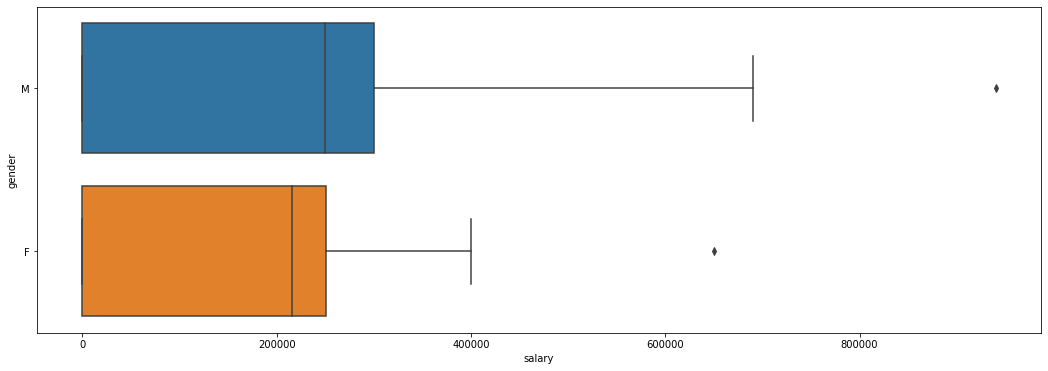

In [17]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "gender", data=data)
plt.show()

In [18]:
"""
Feature: ssc_p (Secondary Education percentage), ssc_b (Board Of Education)

Does Secondary Education affect placements?
"""

'\nFeature: ssc_p (Secondary Education percentage), ssc_b (Board Of Education)\n\nDoes Secondary Education affect placements?\n'

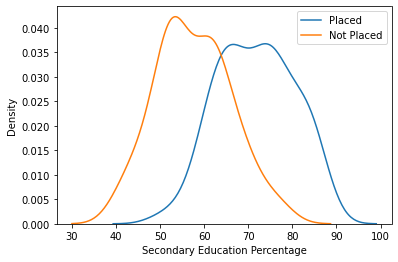

In [19]:
sns.kdeplot(data.ssc_p[data.status=="Placed"])
sns.kdeplot(data.ssc_p[data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Secondary Education Percentage")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


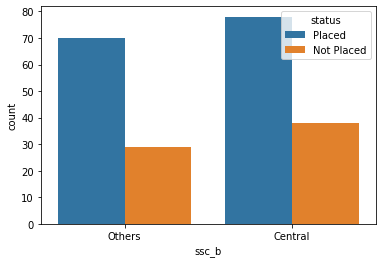

In [20]:
sns.countplot("ssc_b", hue="status", data=data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


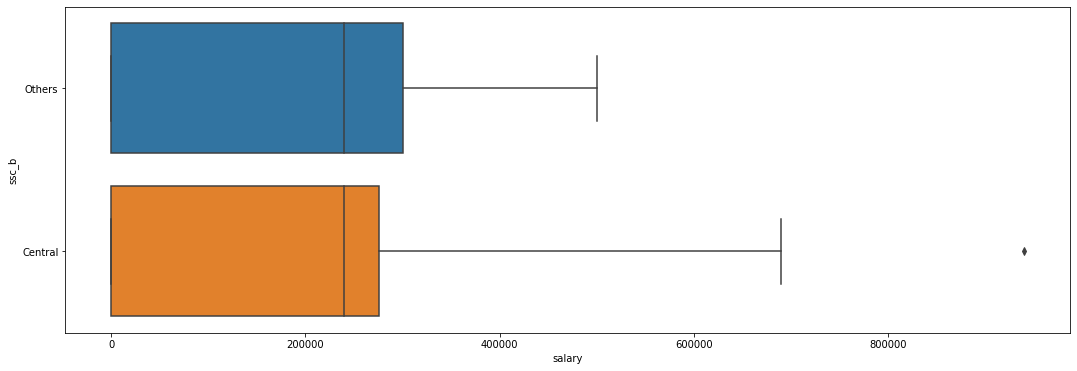

In [21]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "ssc_b", data=data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


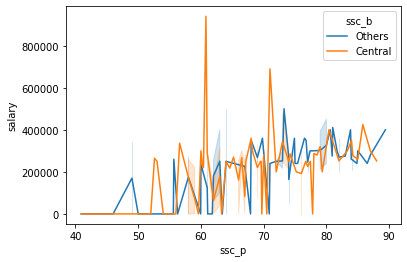

In [22]:
sns.lineplot("ssc_p", "salary", hue="ssc_b", data=data)
plt.show()

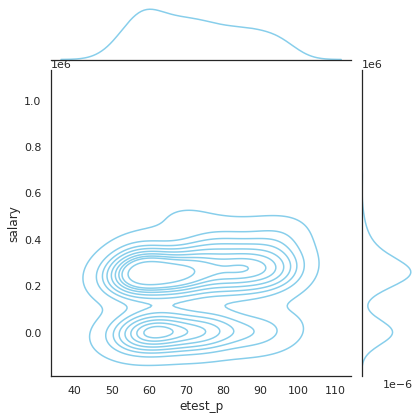

In [23]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=data["etest_p"], y=data["salary"], kind='kde', color="skyblue")

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

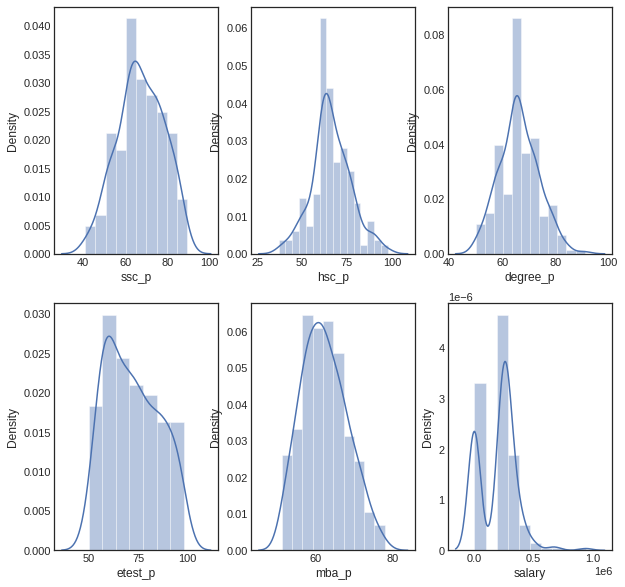

In [24]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.distplot(data['ssc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(data['hsc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(data['degree_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(data['etest_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(data['mba_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(data['salary'])
fig = plt.gcf()
fig.set_size_inches(10,10)

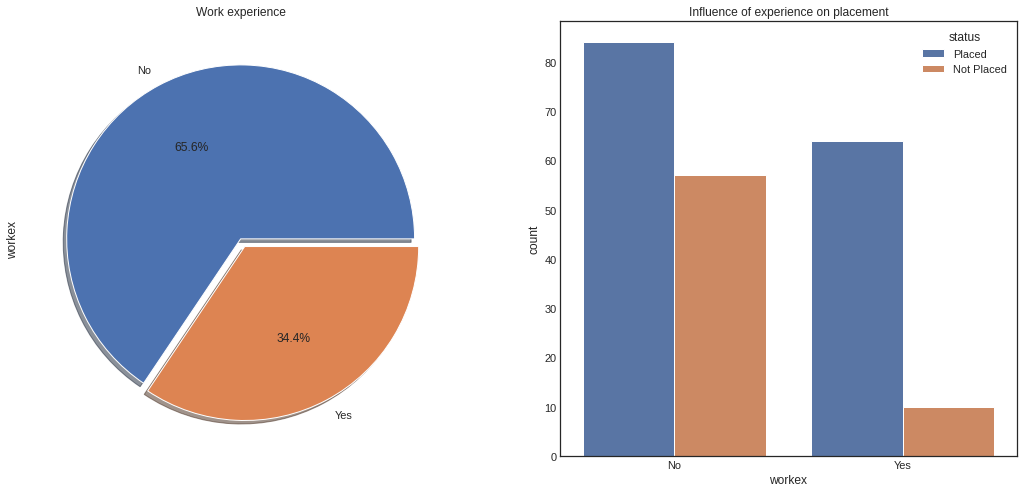

In [25]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
data['workex'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = data)
ax[1].set_title('Influence of experience on placement')

plt.show()

### Preprocessing data for classfication models

In [26]:
from sklearn.preprocessing import LabelEncoder

object_cols = ['gender','workex','specialisation','status']

label_encoder = LabelEncoder()
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [27]:
# Library imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [28]:
# Seperating Features and Target
X = data[['ssc_p', 'hsc_p', 'degree_p', 'etest_p']]
y = data['status']

In [29]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [30]:
# Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8
              precision    recall  f1-score   support

           0       0.73      0.70      0.71        23
           1       0.84      0.86      0.85        42

    accuracy                           0.80        65
   macro avg       0.78      0.78      0.78        65
weighted avg       0.80      0.80      0.80        65



In [31]:
#Using Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8
              precision    recall  f1-score   support

           0       0.86      0.52      0.65        23
           1       0.78      0.95      0.86        42

    accuracy                           0.80        65
   macro avg       0.82      0.74      0.75        65
weighted avg       0.81      0.80      0.79        65



In [32]:
#Using Logistic Regression

LogR = LogisticRegression(solver='lbfgs')
LogR.fit(X_train, y_train)

y_pred = LogR.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7692307692307693
              precision    recall  f1-score   support

           0       0.75      0.52      0.62        23
           1       0.78      0.90      0.84        42

    accuracy                           0.77        65
   macro avg       0.76      0.71      0.73        65
weighted avg       0.77      0.77      0.76        65



## Getting ready for deployment
#### Pickle

In [33]:
pickle.dump(dtree, open('model_classifier.pkl','wb'))

## A Simple HTML Document
#### Creating web app with Flask

In [36]:
from flask import Flask
app = Flask(__name__)

@app.route('/')
def hello_world():
    return 'Hello, World!'

##### Routing

In [37]:
@app.route('/')
def index():
    return 'Index Page'

@app.route('/hello')
def hello():
    return 'Hello, World'

##### Variable Rules

In [38]:
from markupsafe import escape

@app.route('/user/<username>')
def show_user_profile(username):
    # show the user profile for that user
    return 'User %s' % escape(username)

@app.route('/post/<int:post_id>')
def show_post(post_id):
    # show the post with the given id, the id is an integer
    return 'Post %d' % post_id

@app.route('/path/<path:subpath>')
def show_subpath(subpath):
    # show the subpath after /path/
    return 'Subpath %s' % escape(subpath)

##### HTTP Methods

In [39]:
from flask import request

@app.route('/login', methods=['GET', 'POST'])
def login():
    if request.method == 'POST':
        return do_the_login()
    else:
        return show_the_login_form()

##### Static Files
##### Rendering Templates

In [40]:
from flask import render_template

@app.route('/hello/')
@app.route('/hello/<name>')
def hello(name=None):
    return render_template('hello.html', name=name)

AssertionError: ignored

### Penggunaan Virtual Environment
#### Create virtual env
#### Make our own Flask
##### app.py

In [41]:
import flask

app = flask.Flask(__name__, template_folder='templates')

@app.route('/')
def main():
    return(flask.render_template('main.html'))
if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [42]:
@app.route('/predict',methods=['POST'])
def predict():
    '''
    For rendering results on HTML GUI
    '''
    int_features = [int(x) for x in flask.request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)

    output = {0: 'not placed', 1: 'placed'}

    return flask.render_template('main.html', prediction_text='Student must be {} to workplace'.format(output[prediction[0]]))


In [45]:
# if __name__ == "__main__":
  #  app.run(debug=True)

In [44]:
from markupsafe import escape
hello = escape("<strong>Hello</strong>")
hello

Markup('&lt;strong&gt;Hello&lt;/strong&gt;')

Syntax SESI 15 masih belum maksimal